In [4]:
import numpy as np 
import pandas as pd 


dataset = pd.read_csv('insurance.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 6].values

In [5]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 1] = labelencoder.fit_transform(X[:, 1])
X[:, 4] = labelencoder.fit_transform(X[:, 4])
X[:, 5] = labelencoder.fit_transform(X[:, 5])
onehotencoder = OneHotEncoder(categorical_features = [5])
X = onehotencoder.fit_transform(X).toarray()

In [6]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [7]:
# Building the optimal model using Backward Elimination
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((1338, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 1, 2, 3, 4, 6, 7, 8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 2, 3, 4, 6, 7, 8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 2, 4, 6, 7, 8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 4, 6, 7, 8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Sat, 21 Apr 2018   Prob (F-statistic):               0.00
Time:                        09:50:47   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    941.984    -12.848      0.000    -1.4e+04   -1.03e+04
x1           257.8495     11.896     21.675      0.000     234.512     281.187
x2           321.8514     27.378     11.756      0.000     268.143     375.559
x3           473.5023    137.792      3.436      0.001     203.190     743.814
x4          2.381e+04    411.220     57.904      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      301.480   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              722.157
Skew:                           1.215   Prob(JB):                    1.53e-157
Kurtosis:                       5.654   Cond. No.                         292.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:

X_opt = X[:, [0, 2, 3, 4, 6, 7, 8]]

In [9]:
#Splitting X-opt into training and Split test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size = 0.2, random_state = 0)

In [10]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# Predicting the Test set results
#We can compare y_pred and y_test to find its accuracy
y_pred = regressor.predict(X_test)

In [12]:
y_pred

array([11179.78396531,  9478.43960021, 38323.79532847, 16408.17920146,
        7036.28878939,  3837.87153244,  1436.15007609, 14507.76397291,
        9131.84254997,  7642.04803594,  4348.54524981, 10401.03254095,
        8794.02242961,  3787.08759217, 28064.52785452, 10706.01217353,
       11428.61646478,  5978.97671757,  8376.22947501, 27021.75728786,
       33785.0115461 , 14478.74114159, 11600.75786066, 32133.57489599,
        4173.98037729,  9130.70714151,   941.58336413,  9793.96593832,
        3759.9603479 , 10568.49019205,  9128.72005345, 40090.05779589,
       15702.26304759, 13891.48517285, 24620.74114819,  5025.53695782,
       12618.62128196, 30779.56304825, 33674.46414918,  3661.21699033,
        3834.74903591,  3991.63644158, 30408.63374001, 39649.25468794,
       27802.72192668,  5209.74250002, 10595.09645726,  7965.6045085 ,
        3450.23945008, 10205.62630831,  5579.2804889 ,  3541.77664294,
       33033.87405448, 38340.32817368, 16049.61764395,  7040.2672175 ,
      

## Random Forest

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);

In [31]:
predictions = rf.predict(test_features)

In [32]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(test_labels, predictions))
print('MSE:', metrics.mean_squared_error(test_labels, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)))
print('R2:', metrics.r2_score(test_labels, predictions))

Mean Absolute Error: 2623.17 degrees.
Accuracy: 69.91 %.
MAE: 2623.171652847343
MSE: 22573617.85615342
RMSE: 4751.170156514437
R2: 0.8503979895681671


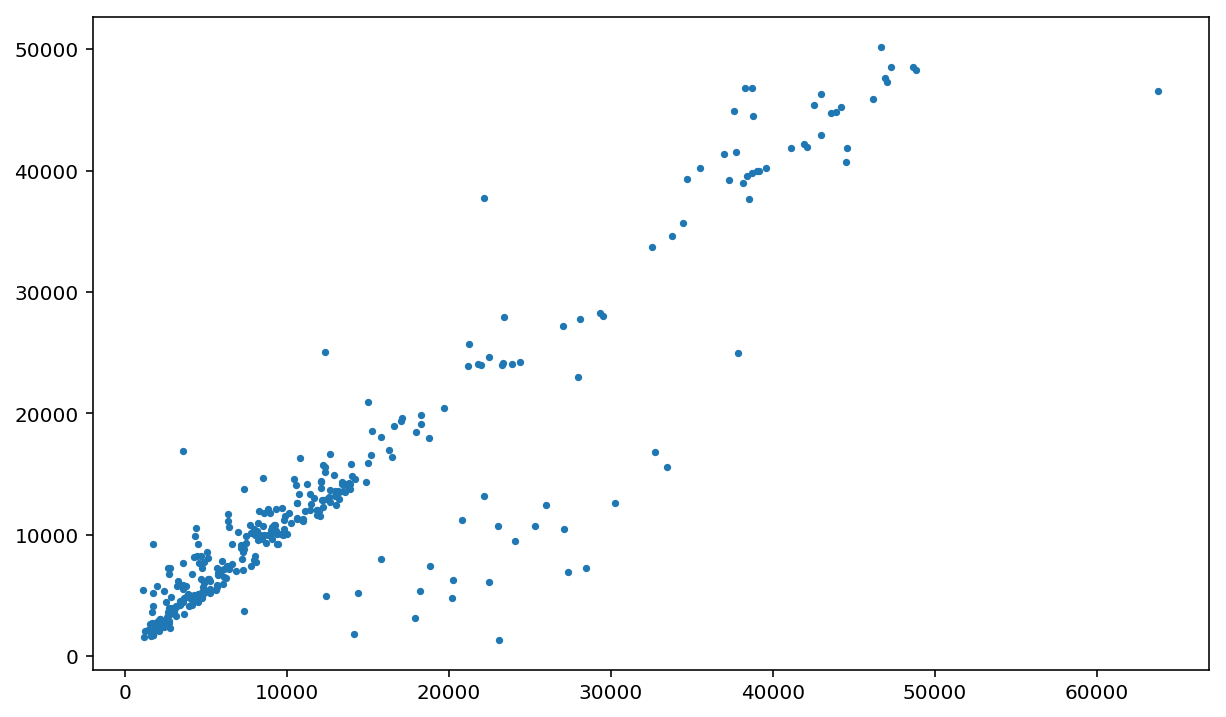

In [34]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['patch.force_edgecolor'] = True
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.figure(figsize=(10,6))
plt.scatter(test_labels, predictions, s = 7)

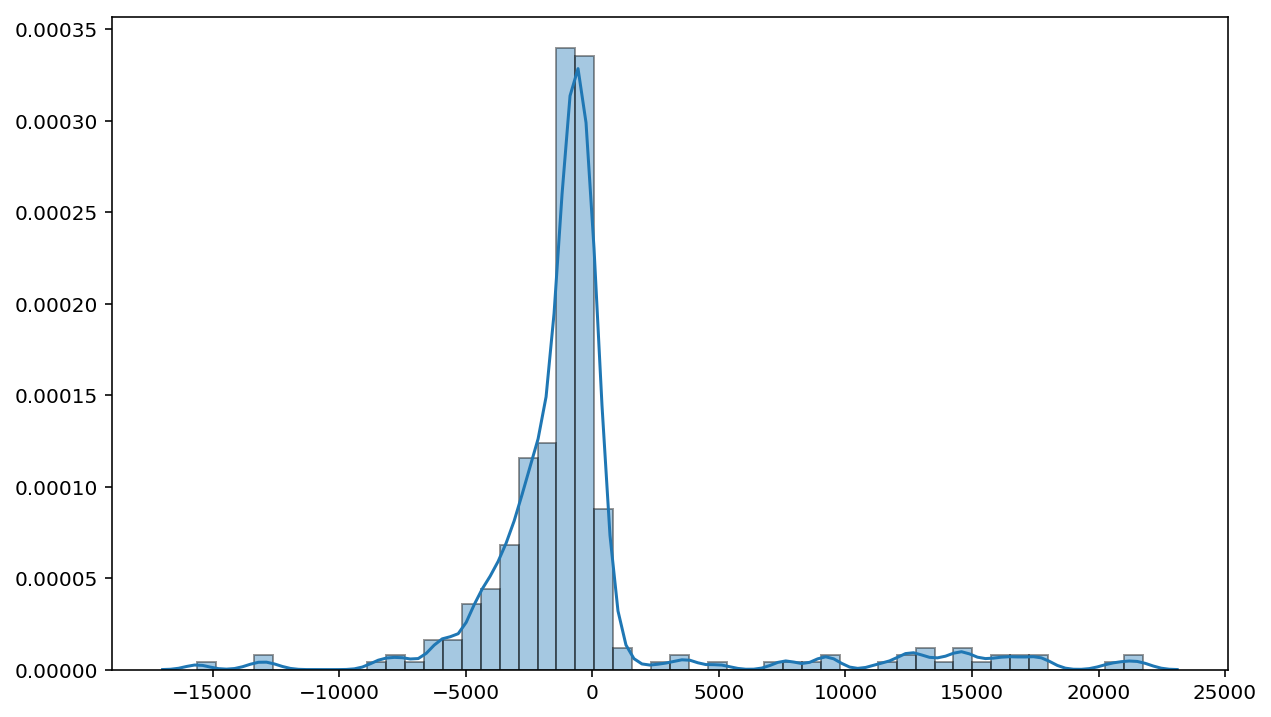

In [35]:
plt.figure(figsize=(10,6))
sns.distplot((test_labels-predictions),bins=50);

In [36]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(test_labels, predictions))
print('MSE:', metrics.mean_squared_error(test_labels, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)))

MAE: 2623.171652847343
MSE: 22573617.85615342
RMSE: 4751.170156514437


## Neural Networks

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [38]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(activation='relu',learning_rate='adaptive',alpha=0.55)
modelneuralnetwork = nn.fit(X_train, y_train)

y_train_prediction = nn.predict(X_train)
y_test_prediction = nn.predict(X_test)

C:\Users\shlok\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [39]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE:', metrics.mean_absolute_error(y_test, y_test_prediction))
print('MSE:', metrics.mean_squared_error(y_test, y_test_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_prediction)))
print('R2:', metrics.r2_score(y_test, y_test_prediction))

MAE: 7674.111094465527
MSE: 164375876.52146327
RMSE: 12820.915588266826
R2: -0.0893673203297487


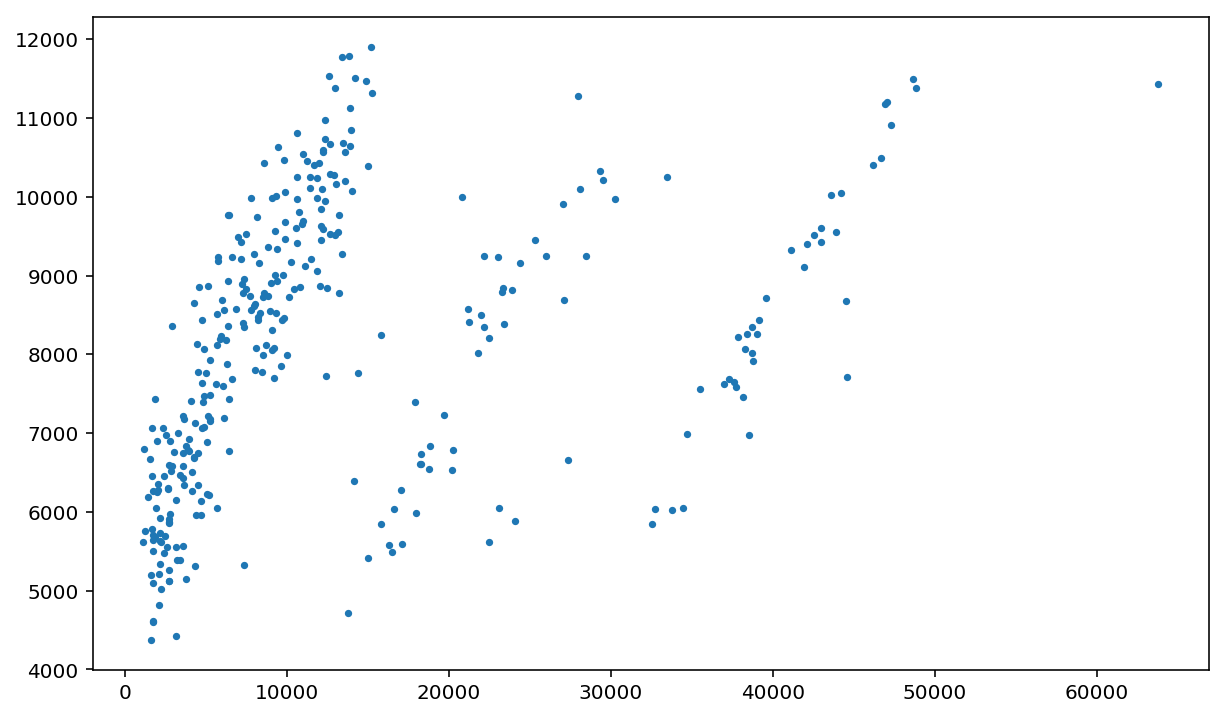

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_test_prediction, s = 7)

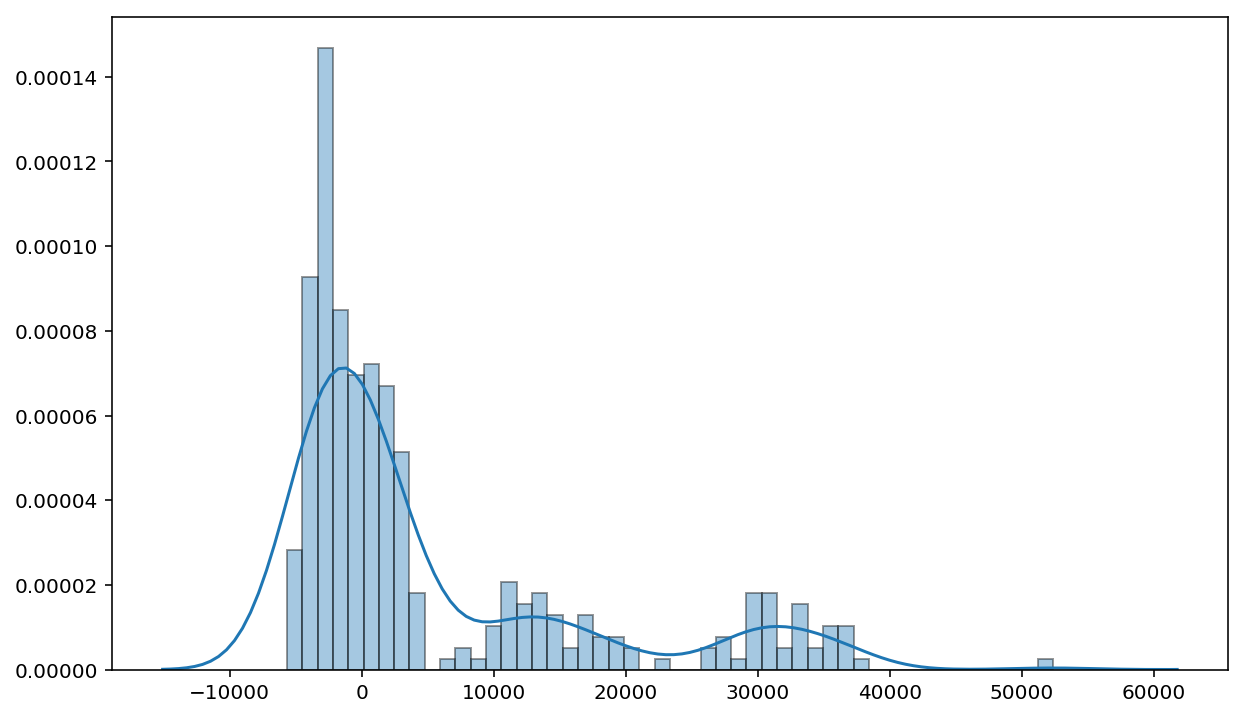

In [41]:
plt.figure(figsize=(10,6))
sns.distplot((y_test - y_test_prediction),bins=50);

## Linear Regression

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
print(lm.intercept_)

-12138.452033838279


In [46]:
predictions = lm.predict(X_test)

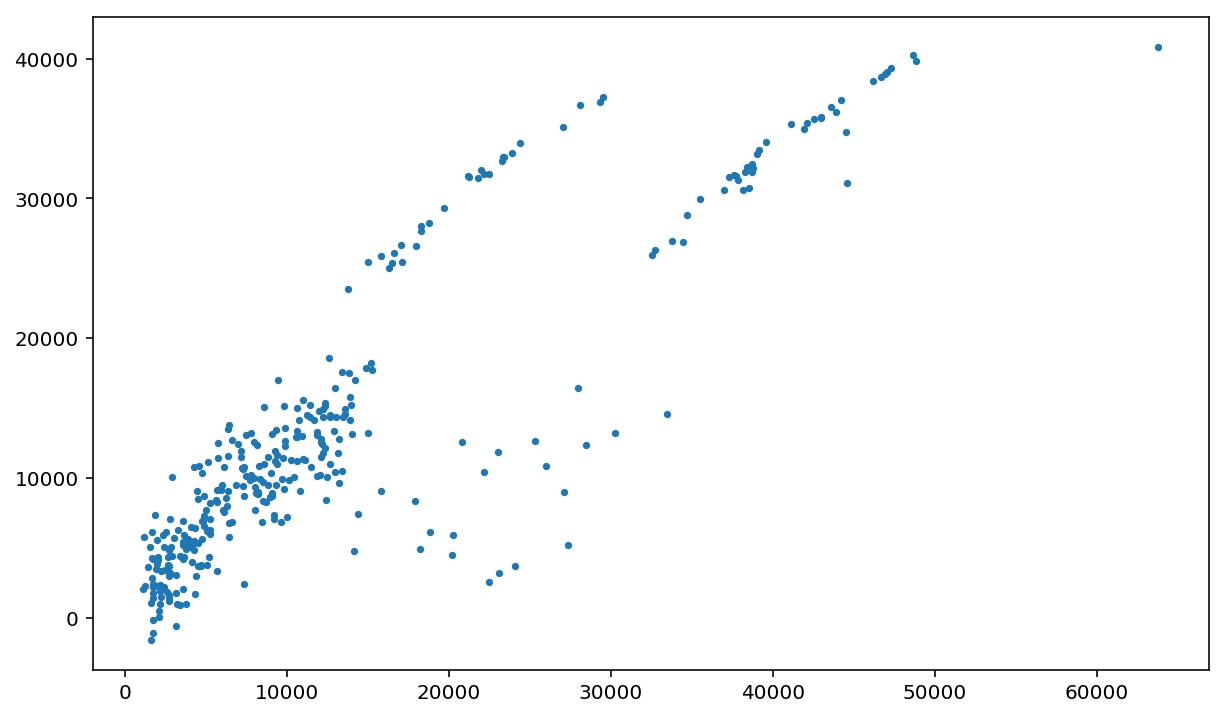

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions, s = 7)

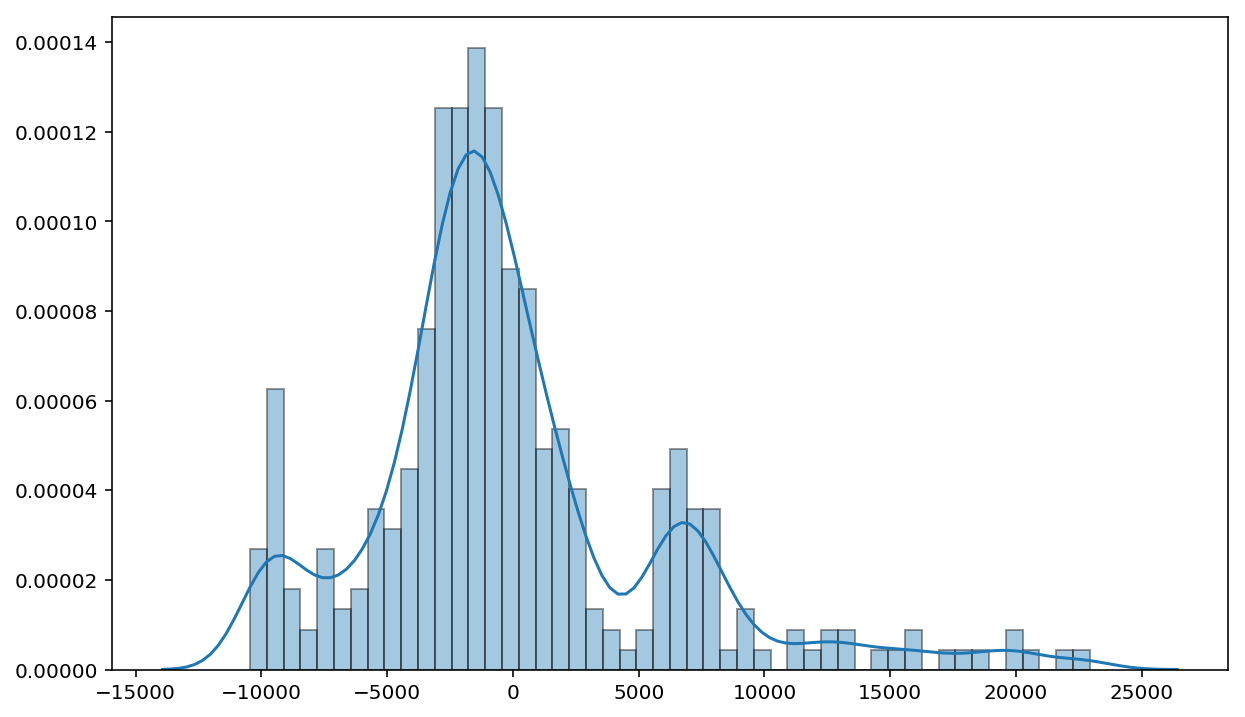

In [48]:
plt.figure(figsize=(10,6))
sns.distplot((y_test-predictions),bins=50);

In [49]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', metrics.r2_score(y_test, predictions))

MAE: 4243.654116653145
MSE: 35117755.73613632
RMSE: 5926.023602394469
R2: 0.7672642952734356
